<a href="https://colab.research.google.com/github/PKhurana31/PKhurana31/blob/main/ESG_Risk_Analysis_S%26P_500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About the Dataset**

This dataset focuses on the ESG (Environmental, Social, and Governance) performance of companies in the S&P 500 index. It is designed to help researchers, investors, analysts, and policymakers understand the sustainability and risk profiles of these major corporations. This analysis of the data aims to identify trends, assess ESG risks, and make informed decisions about investments. This dataset serves as a valuable resource for exploring how ESG factors influence the strategies and operations of some of the largest companies in the world.

The data has been sourced from [Kaggle](https://www.kaggle.com/datasets/pritish509/s-and-p-500-esg-risk-ratings)

In [1]:
# Importing Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Uploading Dataset
from google.colab import files
uploaded = files.upload()

Saving S&P500_ESG_Risk_Analysis.csv to S&P500_ESG_Risk_Analysis.csv


#**Data Processing**

In [4]:
filename = 'S&P500_ESG_Risk_Analysis.csv'
df=pd.read_csv(filename)
df.head()

,Symbol,Company Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,ENPH,"Enphase Energy, Inc.","47281 Bayside Parkway\nFremont, CA 94538\nUnit...",Technology,Solar,"3,157","Enphase Energy, Inc., together with its subsid...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EMN,Eastman Chemical Company,"200 South Wilcox Drive\nKingsport, TN 37662\nU...",Basic Materials,Specialty Chemicals,"14,000",Eastman Chemical Company operates as a special...,25.3,12.8,6.6,5.8,Moderate Controversy Level,2.0,50th percentile,Medium
2,DPZ,Domino's Pizza Inc.,"30 Frank Lloyd Wright Drive\nAnn Arbor, MI 481...",Consumer Cyclical,Restaurants,"6,500","Domino's Pizza, Inc., through its subsidiaries...",29.2,10.6,6.3,12.2,Moderate Controversy Level,2.0,66th percentile,Medium
3,DAY,"Dayforce, Inc.","3311 East Old Shakopee Road\nMinneapolis, MN 5...",Technology,Software - Application,"9,084","Dayforce Inc., together with its subsidiaries,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DVA,Davita Inc.,"2000 16th Street\nDenver, CO 80202\nUnited States",Healthcare,Medical Care Facilities,"70,000",DaVita Inc. provides kidney dialysis services ...,22.6,0.1,8.4,14.1,Moderate Controversy Level,2.0,38th percentile,Medium


In [5]:
# Summary statistics of the DataFrame
df.describe().style.set_caption('Summary Statistics').set_table_styles([{'selector': 'caption',
                                                                      'props': [('font-size', '12pt'),
                                                                                ('font-weight', 'bold')]
                                                                      }])

,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Score
count,430.000000,430.000000,430.000000,430.000000,403.000000
mean,21.533721,5.739767,6.725116,9.070465,2.007444
std,6.889176,5.092421,2.208085,3.657924,0.793283
min,7.100000,0.000000,3.000000,0.800000,1.000000
25%,16.400000,1.800000,5.300000,6.700000,1.000000
50%,21.050000,4.050000,6.100000,8.900000,2.000000
75%,26.000000,8.950000,7.675000,11.200000,2.000000
max,41.700000,25.000000,19.400000,22.500000,5.000000


In [7]:
df_cleaned = df.dropna(subset=['Sector', 'Total ESG Risk score']).reset_index(drop=True)

In [8]:
print(df_cleaned.shape)

(430, 15)


#**Sector-wise ESG Risk Analysis**

The analysis aims to understand ESG risks across different industry sectors. By calculating the average 'Total ESG Risk Score' for companies within each sector, the study creates an industry-specific benchmark. This insight is valuable for investors looking to minimize ESG-related risks in their portfolios.

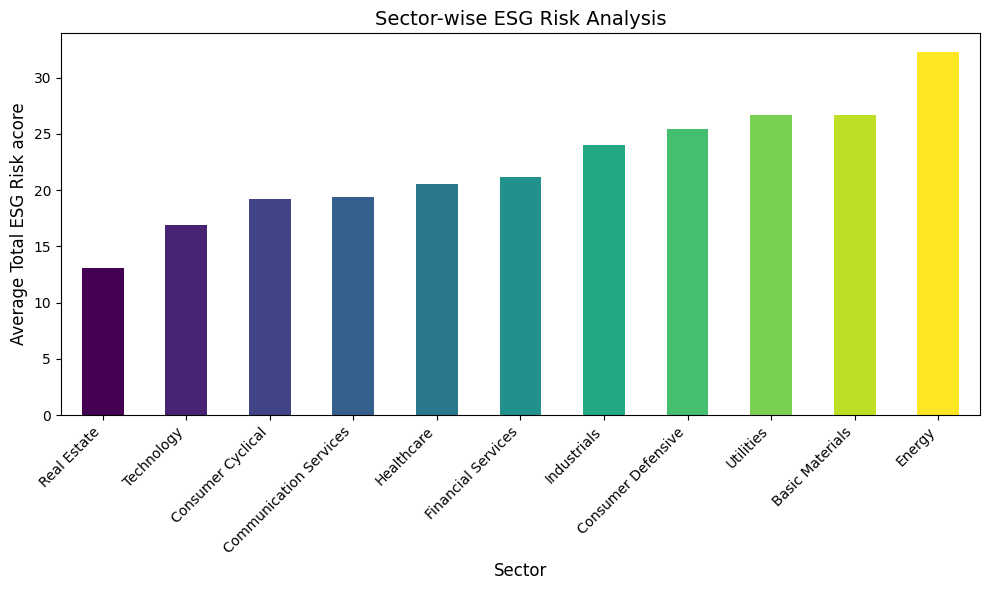

In [9]:
sector_avg_risk = df_cleaned.groupby('Sector')['Total ESG Risk score'].mean().sort_values()
import matplotlib.cm as cm

# Create a colormap with a gradient
cmap = cm.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(sector_avg_risk)))

# Create the bar chart
plt.figure(figsize=(10, 6))
sector_avg_risk.plot(kind='bar', color=colors)

# Set title and labels
plt.title('Sector-wise ESG Risk Analysis', fontsize=14)
plt.xlabel('Sector', fontsize=12)
plt.ylabel('Average Total ESG Risk acore', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()
plt.show()

The analysis reveals key insights that are instrumental for making informed investment decisions. Sectors like Real Estate, Technology, and Consumer Cyclical demonstrate lower average ESG risk scores making them potentially safer havens for ESG-conscious investments.

This is in contrast to Energy, Utilities, and Basic Materials sectors, which show significantly higher average ESG risks of 33.15, 27.75, and 27.42, signaling that investments in these sectors could be subject to higher ESG scrutiny and volatility.

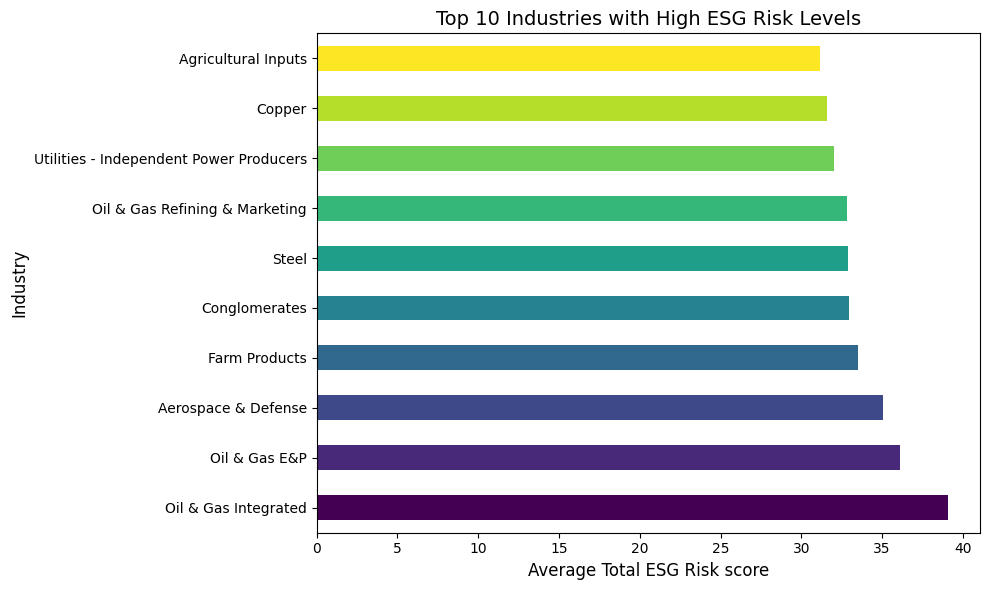

In [10]:
industry_avg_risk = df_cleaned.groupby('Industry')['Total ESG Risk score'].mean().sort_values(ascending=False).head(10)
import matplotlib.cm as cm

# Create a colormap with a gradient
cmap = cm.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(industry_avg_risk)))

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
industry_avg_risk.plot(kind='barh', color=colors)

# Set title and labels
plt.title('Top 10 Industries with High ESG Risk Levels', fontsize=14)
plt.ylabel('Industry', fontsize=12)
plt.xlabel('Average Total ESG Risk score', fontsize=12)

# Display the chart
plt.tight_layout()
plt.show()

This chart highlights the industries with the highest average ESG risk scores, making it clear which sectors face the most significant challenges related to ESG factors. By focusing on the top 10 high-risk industries, we can identify which sectors might require more stringent risk management strategies or targeted improvements in their ESG practices.
**Such insights are valuable for investors and stakeholders aiming to reduce ESG-related risks in their portfolios or influence corporate sustainability efforts within these high-risk sectors.**

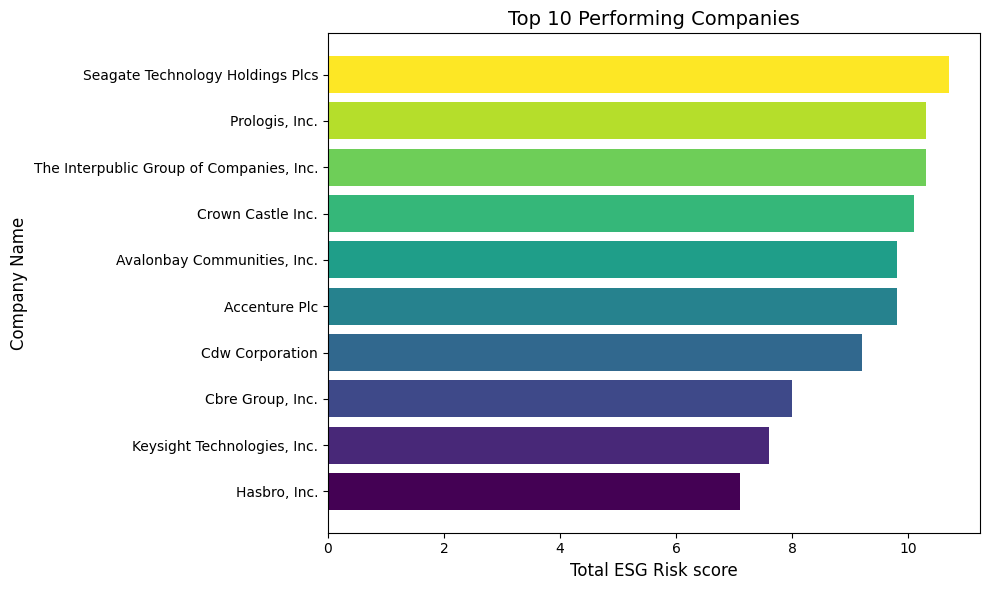

In [18]:
top_10_companies = df_cleaned.sort_values('Total ESG Risk score').head(10)
import matplotlib.cm as cm

# Create a colormap with a gradient
cmap = cm.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(top_10_companies)))

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_companies['Company Name'], top_10_companies['Total ESG Risk score'], color=colors)

# Set title and labels
plt.title('Top 10 Performing Companies', fontsize=14)
plt.ylabel('Company Name', fontsize=12)
plt.xlabel('Total ESG Risk score', fontsize=12)

# Display the chart
plt.tight_layout()
plt.show()

This chart offers a clear view of top companies that are leading the way in ESG performance. These companies have the lowest average ESG risk scores, indicating strong sustainability practices and effective governance.
For investors focused on minimizing ESG-related risks, these companies may represent safer investment opportunities. The low risk scores suggest that these companies are better positioned to avoid issues related to ESG factors.

In [17]:
from plotly.express import scatter
scatter(data_frame=df, x='Total ESG Risk score', y='Controversy Score', color='Sector', hover_name='Symbol').show()

**This plot provides valuable insights to stakeholders and investors looking to assess risk exposure to S&P 500 comapnies.**

It helps to compare how different industry sectors perform in terms of both ESG risk and controversies. We can identify sectors where companies tend to have both high ESG risks and controversy scores, like Energy and Utilities sectors. This also reveals outier companies with unsually high controversy scores relative to their high ESG Risk scores.

#**Social risk analysis by Sector**

Analyzing Social Risk by sector helps us see which industries are most at risk from issues like workforce instability, human rights concerns, and community impact. By measuring the average social risk in each sector, decision-makers can get important insights to guide their investment choices and corporate responsibility efforts. This analysis also highlights sectors that may need extra attention, helping companies and investors focus on reducing risks and improving their social practices. In a world that increasingly values sustainability, these insights are not just helpful—they're crucial.

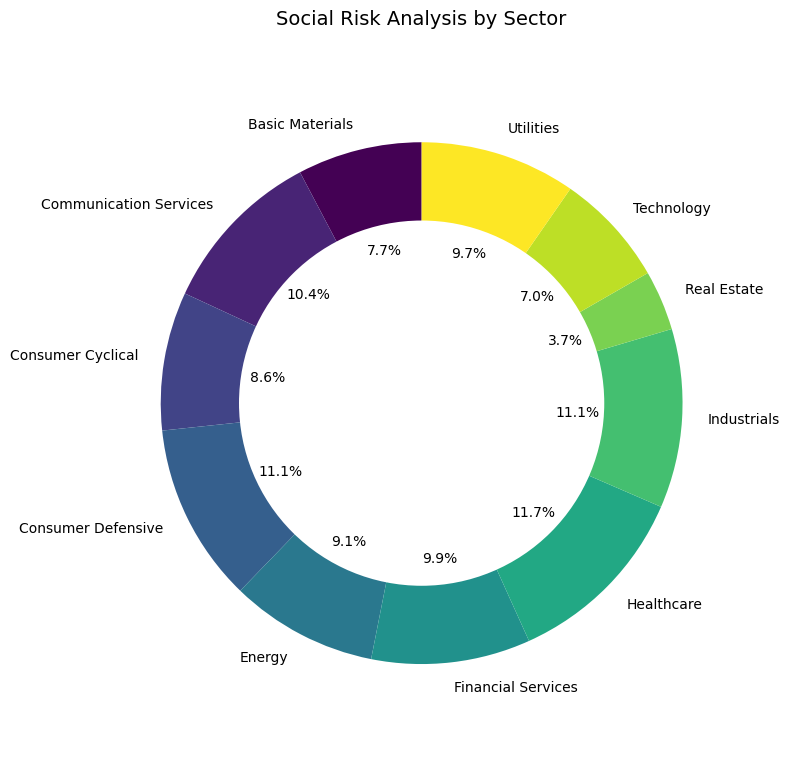

In [19]:
sector_avg_social_risk = df_cleaned.groupby('Sector')['Social Risk Score'].mean()
import matplotlib.cm as cm

cmap = cm.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(sector_avg_social_risk)))

# Create the donut chart
plt.figure(figsize=(8, 8))
plt.pie(sector_avg_social_risk, labels=sector_avg_social_risk.index, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Social Risk Analysis by Sector', fontsize=14)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

#**Conclusion**

As industries and markets evolve, understanding ESG risks becomes increasingly vital for making informed decisions. This analysis of S&P 500 companies reveals key insights into how different sectors manage their ESG challenges. This analysis identified sectors with the highest ESG risks and highlighted top-performing companies with the lowest risk scores, offering valuable benchmarks for excellence in sustainability. Additionally, our social risk analysis sheds light on which industries face the greatest social challenges.

These insights go beyond immediate financial considerations, helping stakeholders evaluate reputational risks and opportunities for sustainable growth. Incorporating ESG factors into decision-making is essential for navigating today’s complex marketplace. By focusing on these analyses, companies and investors can better manage risks, capitalize on opportunities, and show their commitment to a responsible and sustainable future.